<h1>1. Выбор данных</h1>

Abalone Data Set - http://archive.ics.uci.edu/ml/datasets/Abalone


<h1>2. Установка внешних библиотек</h1>

In [1]:
# Устанавливаем необходимые библиотеки

!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scikit-learn

<h1>3. Демонстрирование путей установки</h1>

In [3]:
import sys

print(sys.executable)
print(pd.__file__)
print(np.__file__)
print(plt.__file__)
print(sns.__file__)
print(sklearn.__file__)

/opt/anaconda3/bin/python
/opt/anaconda3/lib/python3.9/site-packages/pandas/__init__.py
/opt/anaconda3/lib/python3.9/site-packages/numpy/__init__.py
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py
/opt/anaconda3/lib/python3.9/site-packages/seaborn/__init__.py
/opt/anaconda3/lib/python3.9/site-packages/sklearn/__init__.py


<h1>4. Импорт библиотек</h1>

In [1]:
# Импортируем необходимые библиотеки для анализа данных

# Библиотеки работы с данными
import pandas as pd
import numpy as np

# Библиотки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка графиков
# plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams.update({'font.size': 18})

# Библиотека машинного обучения
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

<h1>5. Описание данных</h1>

Предсказание возраста морского ушка (моллюски) по физическим измерениям. Возраст морского ушка определяется путем разрезания раковины через конус, окрашивания ее и подсчета количества колец под микроскопом - скучная и трудоемкая задача. Другие измерения, которые легче получить, используются для прогнозирования возраста. Для решения проблемы может потребоваться дополнительная информация, такая как погодные условия и местоположение (следовательно, наличие продуктов питания).

**Название / Тип Данных / Единица измерения / Описание**

* Sex - Пол / номинальный / -- / M (мужчина), F (женщина) и I (младенец)
* Length - Длина / непрерывная / мм / Измерение самой длинной оболочки
* Diameter - Диаметр / непрерывный / мм / перпендикулярный длине
* Height - Высота / непрерывная / мм / с мясом в скорлупе
* Whole_weight - Весь вес / непрерывный / грамм / целое морское ушко
* Shucked_weight - Очищенный вес / непрерывный / грамм / вес мяса
* Viscera_weight - Вес внутренних органов / непрерывный / грамм / вес кишечника (после кровотечения)
* Shell_weight - Вес скорлупы / непрерывный / грамм / после сушки
* Rings - Кольца / целое число / -- / +1.5 дает возраст в годах

In [2]:
# Импортируем данные
names = [
    'Sex', 'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

df = pd.read_csv('abalone.csv', names=names)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
df['Whole_weight_class'] = np.where(df.Whole_weight > 1, 'Over 1', 'Less 1')

In [4]:
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Less 1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Less 1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Less 1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Less 1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Less 1


<h1>6. Подготовка данных</h1>

In [5]:
df.info() # пропущенных данных нет; неверно интерпретирвоанных данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   Length              4177 non-null   float64
 2   Diameter            4177 non-null   float64
 3   Height              4177 non-null   float64
 4   Whole_weight        4177 non-null   float64
 5   Shucked_weight      4177 non-null   float64
 6   Viscera_weight      4177 non-null   float64
 7   Shell_weight        4177 non-null   float64
 8   Rings               4177 non-null   int64  
 9   Whole_weight_class  4177 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 326.5+ KB


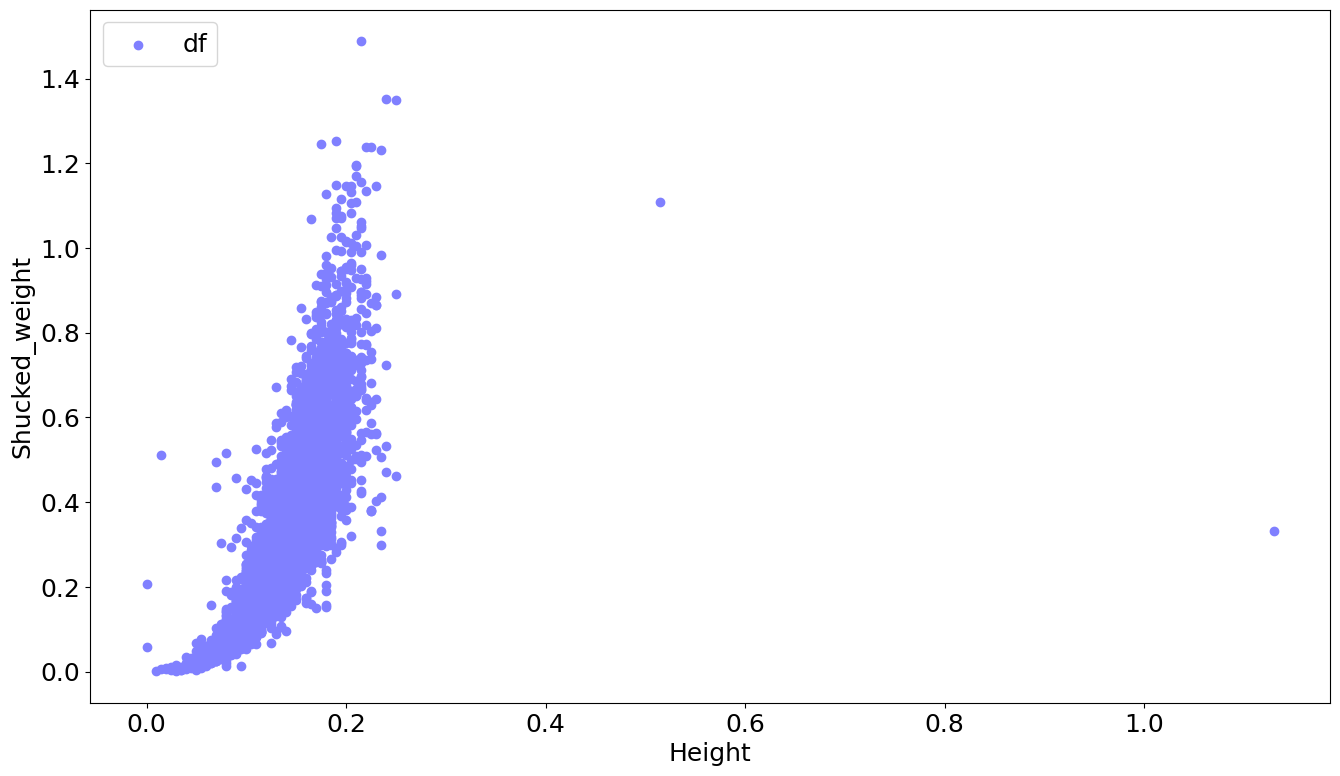

In [6]:
fig, ax = plt.subplots()
ax.scatter(df.Height, df.Shucked_weight, label='df', c='#8080ff')
ax.set_xlabel('Height')
ax.set_ylabel('Shucked_weight')
plt.legend(loc='upper left')

Видно, что имеется два выброса в тестовой выборке - удалим их

In [7]:
df = df.drop(index=list(df.query("Height>0.4").index))

<h1>7. Матрица корреляции</h1>

<Axes: >

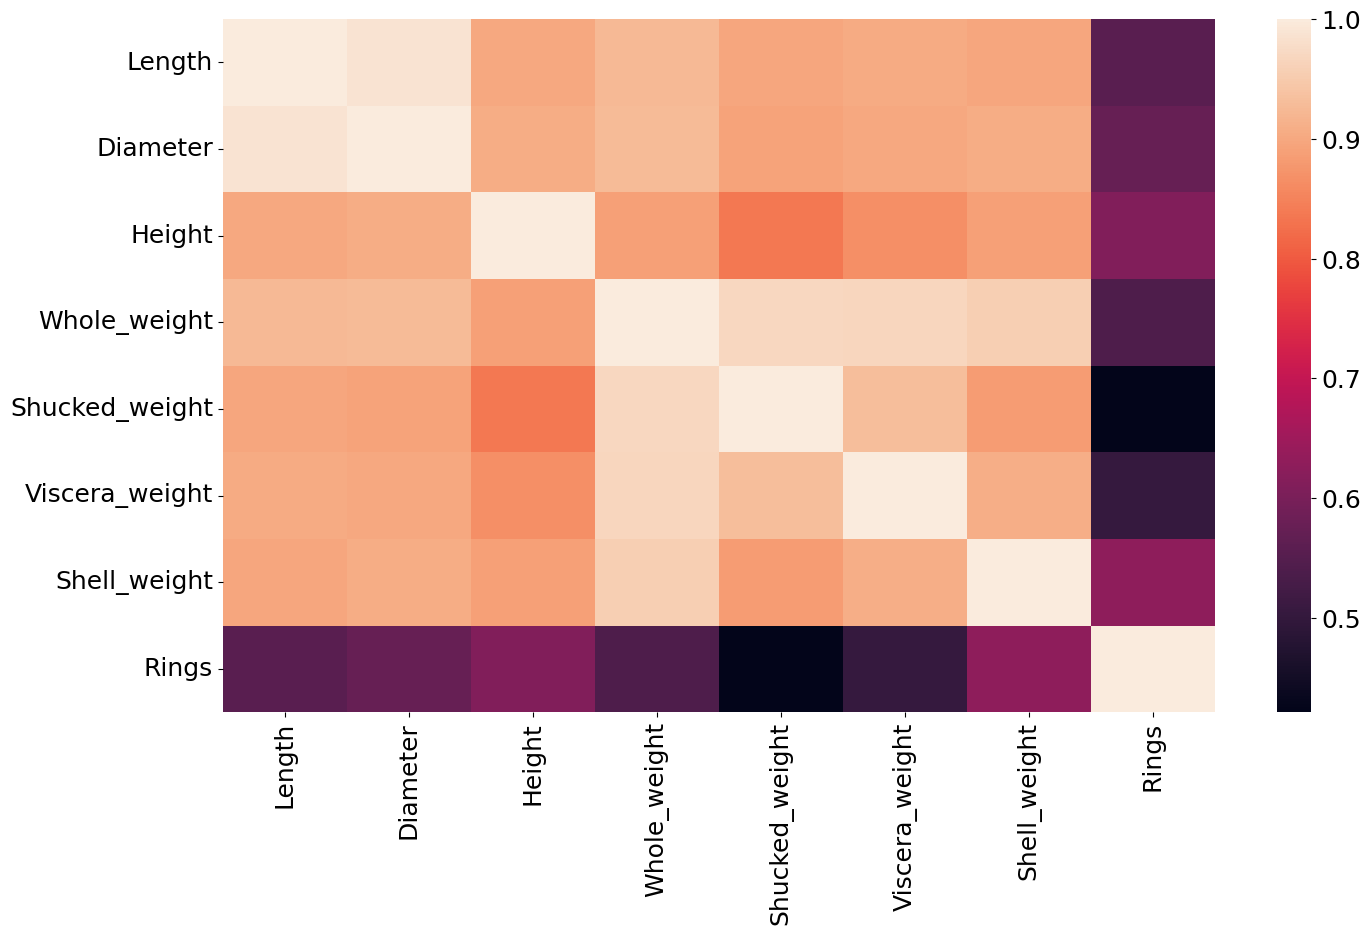

In [9]:
sns.heatmap(data=df.corr(numeric_only=True))
# Height, Shucked_weight - берем за факторы
# Whole_weight - берем за переменную отклика

In [10]:
X, y = df[['Height', 'Shucked_weight']].values, df['Whole_weight_class']

In [11]:
model = KMeans(n_clusters=2)
model.fit(X)
print('labels ', model.labels_, '\n')
print('cluster center ', model.cluster_centers_, '\n')
model_pedictions = model.predict(X)

labels  [0 0 0 ... 1 1 1] 

cluster center  [[0.1167962  0.20540347]
 [0.17003702 0.57105211]] 



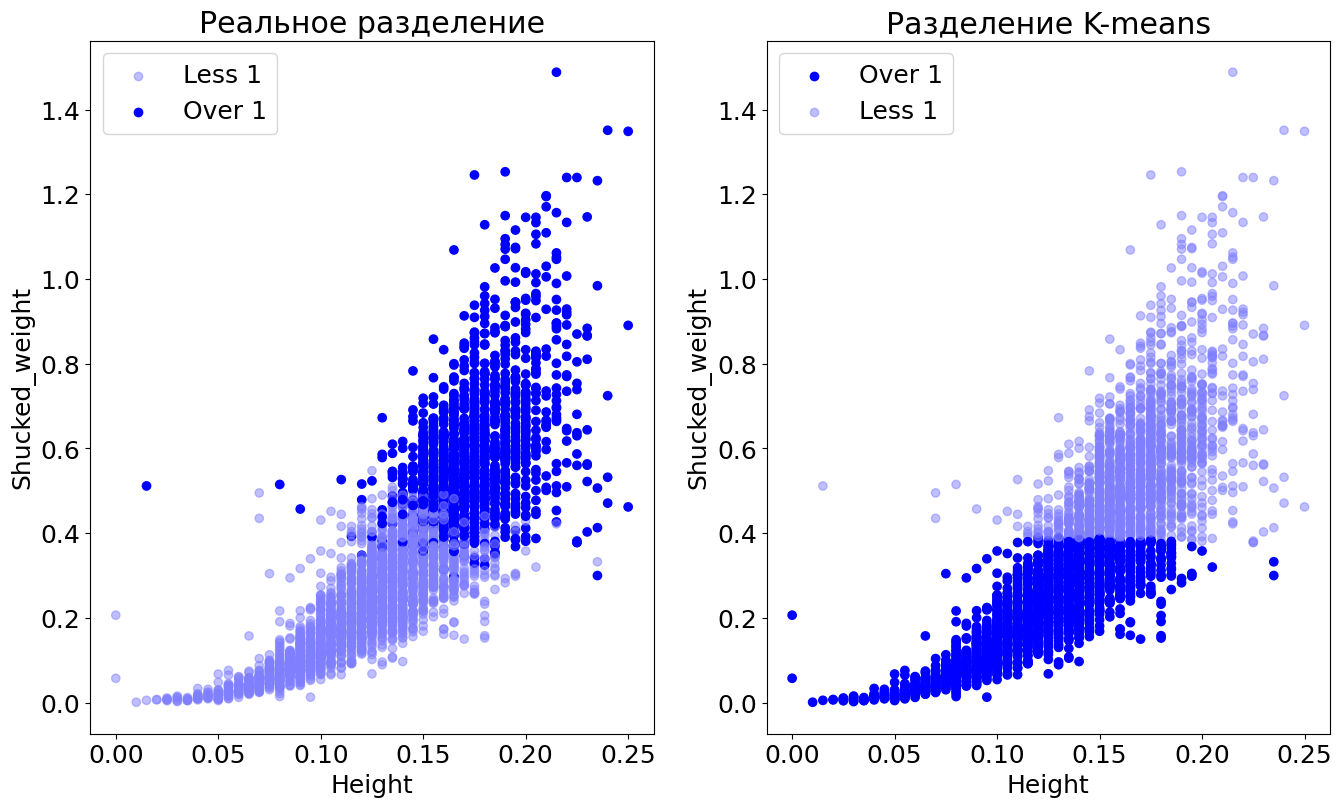

In [12]:
fig, ax = plt.subplots(1,2)

# Реальное разделение

clr = ['#0000ff' if e == 'Over 1' else '#8080ff' for e in df['Whole_weight_class']]
alf = [1 if e == 'Over 1' else 0.5 for e in df['Whole_weight_class']]
lbl = ['Over 1' if e == 'Over 1' else 'Less 1' for e in df['Whole_weight_class']]

ax[0].scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c=clr, alpha=alf)
ax[0].scatter(X[0,0], X[0,1], c=clr[0], label=lbl[0], alpha=alf[0])
ax[0].scatter(X[4174,0], X[4174,1], c=clr[4174], label=lbl[4174], alpha=alf[4174])
ax[0].set(title='Реальное разделение', xlabel='Height', ylabel='Shucked_weight')
ax[0].legend(loc='upper left')


# Разделение K-means

clr = ['#0000ff' if e == 0 else '#8080ff' for e in model_pedictions]
alf = [1 if e == 0 else 0.5 for e in model_pedictions]
lbl = ['Over 1' if e == 0 else 'Less 1' for e in model_pedictions]

ax[1].scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c=clr, alpha=alf)
ax[1].scatter(X[0,0], X[0,1], c=clr[0], label=lbl[0], alpha=alf[0])
ax[1].scatter(X[3000,0], X[3000,1], c=clr[3000], label=lbl[3000], alpha=alf[3000])
ax[1].set(title='Разделение K-means', xlabel='Height', ylabel='Shucked_weight')
ax[1].legend(loc='upper left')

In [13]:
model = KMeans(n_clusters=4)
model.fit(X)
print('labels ', model.labels_, '\n')
print('cluster center ', model.cluster_centers_, '\n')
model_pedictions = model.predict(X)

labels  [0 0 2 ... 1 1 3] 

cluster center  [[0.09718967 0.12185621]
 [0.16752775 0.53577882]
 [0.1422971  0.32158116]
 [0.19117737 0.82694801]] 



In [14]:
model_pedictions

array([0, 0, 2, ..., 1, 1, 3], dtype=int32)

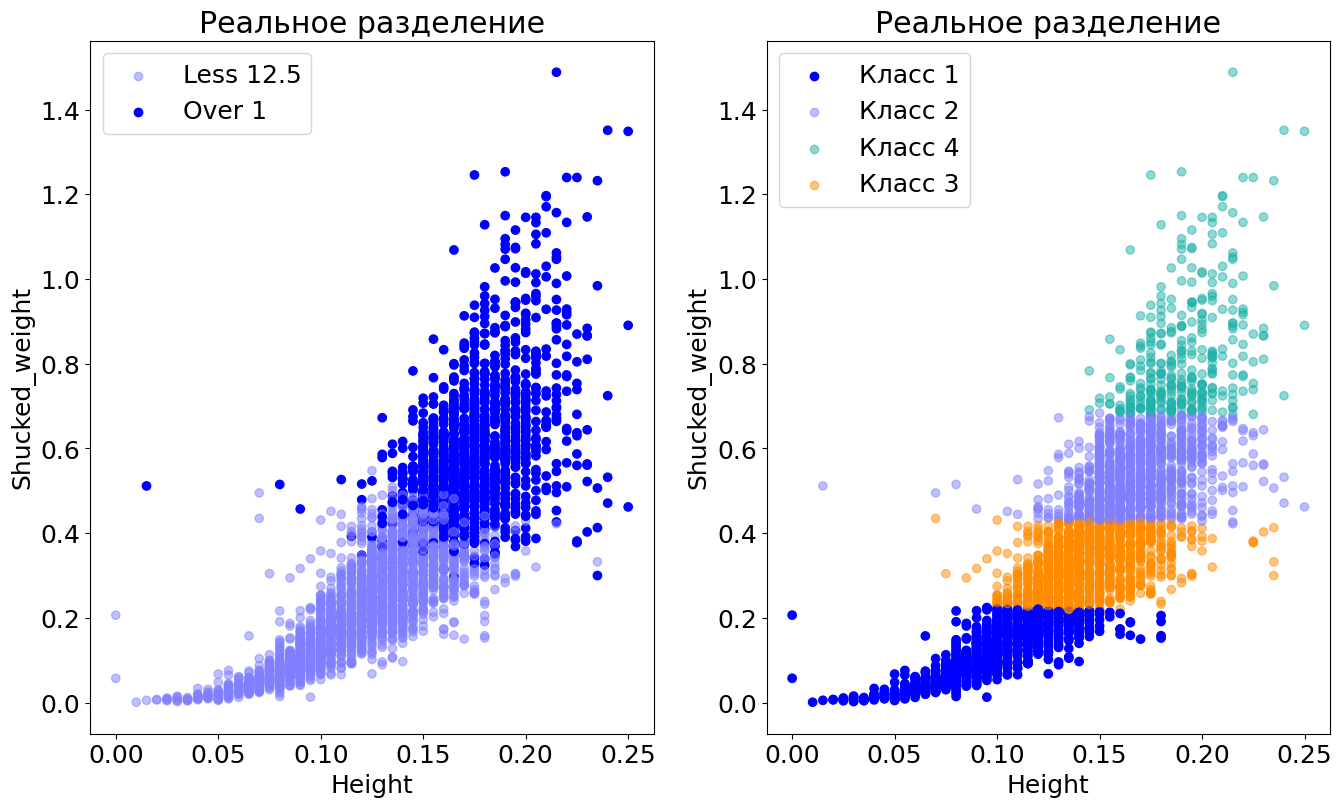

In [15]:
fig, ax = plt.subplots(1,2)

# Реальное разделение

clr = ['#0000ff' if e == 'Over 1' else '#8080ff' for e in df['Whole_weight_class']]
alf = [1 if e == 'Over 1' else 0.5 for e in df['Whole_weight_class']]
lbl = ['Over 1' if e == 'Over 1' else 'Less 12.5' for e in df['Whole_weight_class']]

ax[0].scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c=clr, alpha=alf)
ax[0].scatter(X[0,0], X[0,1], c=clr[0], label=lbl[0], alpha=alf[0])
ax[0].scatter(X[4174,0], X[4174,1], c=clr[4174], label=lbl[4174], alpha=alf[4174])
ax[0].set(title='Реальное разделение', xlabel='Height', ylabel='Shucked_weight')
ax[0].legend(loc='upper left')


# Разделение K-means

clr = ['#0000ff' if e == 0 else '#8080ff' if e==1 else '#FF8C00' if e==2 else '#20B2AA' for e in model_pedictions]
alf = [1 if e == 0 else 0.5 if e==1 else 0.5 if e==2 else 0.5 for e in model_pedictions]
lbl = ['Класс 1' if e == 0 else 'Класс 2' if  e==1 else 'Класс 3' if e==2 else 'Класс 4' for e in model_pedictions]

ax[1].scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c=clr, alpha=alf)

ax[1].scatter(X[0,0], X[0,1], c=clr[0], label=lbl[0], alpha=alf[0])
ax[1].scatter(X[1500,0], X[1500,1], c=clr[1500], label=lbl[1500], alpha=alf[1500])
ax[1].scatter(X[4174,0], X[4174,1], c=clr[4174], label=lbl[4174], alpha=alf[4174])
ax[1].scatter(X[2,0], X[2,1], c=clr[2], label=lbl[2], alpha=alf[2])


ax[1].set(title='Реальное разделение', xlabel='Height', ylabel='Shucked_weight')
ax[1].legend(loc='upper left')